## Урок 4. Домашнее задание 

### 4.1 Домашнее задание начального уровня

Потренируйтесь в программировании на python. Надо будет найти расстояние от каждой точки из массива $X$ до центра кластера, а потом просуммировать эти расстояния. Это будет реализацией библиотечной функции `sklearn.metrics.pairwise.euclidean_distances` из первого урока.  В итоге у Вас должно получиться число чуть более $16$ - это и будет расстояние.
$$
\sum_{i=1}^{k} \mid x_i - c \mid
$$

где для одного обучающего примера x, состоящего из двух координат:
$$
\mid x - c \mid = (x_1-c_1)^2 + (x_2-c_2)^2
$$

**Примечание** Как вы уже знаете из урока про линейную регрессию, в этой формуле должен быть квадратный корень, но для скорости работы мы опускаем его.

**Подсказка** Средствами библиотеки numpy реализуйте формулу нахождения суммы внутрикластерных расстояний

In [139]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean # эвклидово расстояние
from sklearn.metrics.pairwise import euclidean_distances # эвклидово расстояние

import pickle

In [140]:
clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

# -- ВАШ КОД ТУТ --



In [141]:
((clust - centroid) **2).sum(axis = 1).sum(axis = 0)

16.31211696438564

In [142]:
((clust - centroid) **2).sum()

16.312116964385638

In [143]:
# через цикл
sum_ = 0
for i in range (clust.shape[0]):
    sum_ += (clust[i][0] - centroid[0]) **2 + (clust[i][1] - centroid[1]) **2
sum_

16.31211696438564

In [144]:
# через scipy.spatial.distance.euclidean
sum_ = 0
for i in range (clust.shape[0]):
    sum_ += euclidean(clust[i], centroid) **2
sum_

16.31211696438564

In [159]:
# через sklearn.metrics.pairwise.euclidean_distances
((euclidean_distances(clust, centroid.reshape(1,-1))) **2).sum()

16.31211696438564

### 4.2 Домашнее задание начального уровня  

Обучите алгоритм k-средних для количества кластеров $n=3$ на том же датасете, который содержится в файле `data/clustering.pkl`. Визуализируйте результат:

In [145]:
# -- ВАШ КОД ТУТ --
# данные получены с помощью функции make_classification 
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [146]:
kmeans_model = KMeans(n_clusters = 3, random_state = 42)
kmeans_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

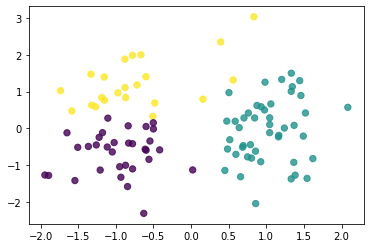

In [147]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=kmeans_model.labels_, marker='o', alpha=0.8, label='data')
plt.show()

### 4.3 Домашнее задание высокого уровня

Мы узнали про эвристику, улучшающую алгоритм: запустить несколько раз алгоритм, запомнить, куда попали центроиды при каждом запуске, а потом усреднить координаты за все несколько запуска.

Попробуйте применить эту эвристику на практике: 

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами
<pre>
kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
</pre>
* в каждом запуске сохраняйте координаты центроидов общий массив $c$. См. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/several_init_knn.png)

In [136]:
# -- ВАШ КОД ТУТ --
x1, y1, x2, y2 = np.array([]), np.array([]), np.array([]), np.array([])
for i in range (10):
    kmeans = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
    kmeans_model = kmeans.fit(X)
    x1 = np.append(x1, kmeans.cluster_centers_[0][0])
    y1 = np.append(y1, kmeans.cluster_centers_[0][1])
    x2 = np.append(x2, kmeans.cluster_centers_[1][0])
    y2 = np.append(y2, kmeans.cluster_centers_[1][1])
    

In [137]:
x1, y1

(array([ 0.11085681, -0.97742455,  0.80491291, -0.16346444,  1.00715164,
         0.71585996, -0.94233808,  0.97792098, -0.97742455,  0.95917947]),
 array([-0.48272021, -0.03263543,  0.32249851, -0.42546836,  0.04040685,
         0.28931438,  0.29154215,  0.10168404, -0.03263543,  0.07757361]))

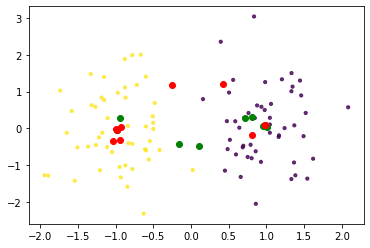

In [138]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=kmeans_model.labels_, marker='o', alpha=0.8, label='data')
plt.scatter(x1, y1, c = 'g')
plt.scatter(x2, y2, c = 'r')
plt.show()

Мы выяснили, что один из недостатков алгоритма k-средних состоит в том, что количество кластеров надо задать до тренировки модели, но как же определить, сколько будет кластеров в данных? Для этой задачи существует эффективный алгоритм, о котором мы поговорим в следующем уроке.